# Australian  Beverage Company Retail Forecasting

## Business Understanding

### Overview

Company XYZ is an Australian based beverage company.They sell their products through various super-markets and also engage into heavy promotions throughout the year. Their demand is also influenced by various factors like holiday, seasonality.

At the time, they were using their own software, written in-house, but it often produced forecasts that did not seem sensible. Company wanted to explore power of AI/ML based forecasting to replace their in house local solution.The project will be based on using time series forecasting using Machine Learning algorithms.We will forecast the retail for future periods.

Retail forecasting helps in maintaining a good stock inventory management .Where by we are able to know the demand by forecasting and therefore we can maintain a optimum inventory level for avoid stockouts therefore the customers loyalty is maintain by finding their required products always ready.Retail forecasting also aids in avoid wastage by having excess amounts of stock the resources could used in another productive way to increase revenue in an efficient way.Reducing stockouts and reducing wastage increases the amount of profit for the business.

The Project success criteria will be a forecast accuracy of 90% meaning that the forecast error is than 10% of the actual sales.

### Problem Statement
 Inaccurate forecasting can lead to overstocking or understocking of products, which can result in lost sales, increased costs, and reduced customer satisfaction. The company needs an accurate and reliable forecasting model that takes into account the various factors that influence demand and can provide timely and actionable insights to support decision-making.

### Objective

* The main objective is to forecast accurate sales
* To determine the season with the most sales
* To determine which holiday has the most sales
* To determine which month has the most sales

## Data Understanding


The data has 12 columns and 1218 rows

The data was collected from 2017 to 2020 about the sales for the Australian Company

The description for the data is found below:

 * Product: This column  refers to the unique identifier or code for a particular product.

 * Date: This column indicates the date of sale for the product.

 * Sales: This column shows the total sales revenue generated by the product on the given date.

 * Price Discount (%): This column indicates the percentage discount that was applied to the product's price at the time of sale.

 * In-Store Promo: This column indicates whether there was a promotion or discount offered specifically for in-store purchases.

 * Catalogue Promo: This column indicates whether there was a promotion or discount offered through a catalogue or other print or digital media.

 * Store End Promo: This column indicates whether there was a promotion or discount offered specifically at the end of a store's promotional period.

 * Google_Mobility: This column is a measure of the relative mobility or foot traffic in the area surrounding the store where the product was sold, based on Google's location data.

 * Covid_Flag: This column  indicates whether there were any COVID-related restrictions or concerns in effect on the date of sale.

 * V_DAY: This column  indicates whether the date of sale was close to or on Valentine's Day.

 * EASTER: This column  indicates whether the date of sale was close to or on Easter.

 * CHRISTMAS: This column  indicates whether the date of sale was close to or on Christmas.

In [84]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df=pd.read_csv('forecasting_case_study.xlsx - Sheet1.csv')
#preview the first five rows of the data
df.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2/5/2017,27750,0%,0,0,0,0.0,0,0,0,0
1,SKU1,2/12/2017,29023,0%,1,0,1,0.0,0,1,0,0
2,SKU1,2/19/2017,45630,17%,0,0,0,0.0,0,0,0,0
3,SKU1,2/26/2017,26789,0%,1,0,1,0.0,0,0,0,0
4,SKU1,3/5/2017,41999,17%,0,0,0,0.0,0,0,0,0


* The Price Discount (%) column should have the percentage sign removed in the data

In [86]:
# preview the last five rows of the data
df.tail()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
1213,SKU6,10/18/2020,96619,54%,0,1,0,-7.56,1,0,0,0
1214,SKU6,10/25/2020,115798,52%,0,1,0,-8.39,1,0,0,0
1215,SKU6,11/1/2020,152186,54%,1,0,1,-7.43,1,0,0,0
1216,SKU6,11/8/2020,26445,44%,1,0,1,-5.95,1,0,0,0
1217,SKU6,11/15/2020,26414,44%,0,0,0,-7.20,1,0,0,0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product             1218 non-null   object 
 1   date                1218 non-null   object 
 2   Sales               1218 non-null   int64  
 3   Price Discount (%)  1218 non-null   object 
 4   In-Store Promo      1218 non-null   int64  
 5   Catalogue Promo     1218 non-null   int64  
 6   Store End Promo     1218 non-null   int64  
 7   Google_Mobility     1218 non-null   float64
 8   Covid_Flag          1218 non-null   int64  
 9   V_DAY               1218 non-null   int64  
 10  EASTER              1218 non-null   int64  
 11  CHRISTMAS           1218 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 114.3+ KB


* The data has 12 columns and 1218 rows
* The datatype for the columns include 3 objects, 8 integers and one float
* The date column is of object datatype it needs to be transformed to datetime
* The Easter,Christmas,Covid_Flag,V_day,In-Store Promo,Catalogue Promo,Store End Promo need to be changed from integers to boolean
* The V_Day column should be renamed to Valentines 
* The Price Discount column should be converted from object to integer after removing the percentage sign in the data

In [88]:
df.describe()

,Sales,In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,30294.678982,0.472085,0.212644,0.348933,-2.377406,0.226601,0.019704,0.019704,0.018883
std,35032.527297,0.499425,0.409346,0.476828,5.806291,0.418804,0.139040,0.139040,0.136169
min,0.000000,0.000000,0.000000,0.000000,-28.490000,0.000000,0.000000,0.000000,0.000000
25%,7212.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19742.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40282.250000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,288322.000000,1.000000,1.000000,1.000000,3.900000,1.000000,1.000000,1.000000,1.000000


* The highest sales for a product to a supermakert is 288322
* Google moblity has the lowest as -28.49 and highest of 3.9


In [89]:
# finding the number of unique values for products
print('unique values','\n',df['Product'].value_counts())

unique values 
 SKU3    204
SKU1    204
SKU2    204
SKU4    204
SKU5    204
SKU6    198
Name: Product, dtype: int64


* In terms of product class there is no class imbalance

In [90]:
df.CHRISTMAS.value_counts()

0    1195
1      23
Name: CHRISTMAS, dtype: int64

## Data Preparation

##### Data preprocessing

This will involve checking for :
* Completeness - Checking for missing values in the data
* Uniformity - Here we check for the uniformity of the data and this includes looking at the data types of the different columns and   ensuring they are are correct.we check to ensure the labels of the columns are uniform and explicit
* Consistency - Involves checking for duplicated entries in the data
* Validity - Involves checking for outliers in the data

Incase any of these are not met we will do the necessary process to make the data complete,valid,uniform and consistent

In [91]:
# renaming the V_Day column to Valentines
df.rename(columns={'V_DAY':'VALENTINES'},inplace=True)

In [92]:
# removing the percentage sign in the price discount column
df['Price Discount (%)']=df['Price Discount (%)'].map(lambda x: x.strip('%'))

In [93]:
# checking to see whether the % signshave been removed
df.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,VALENTINES,EASTER,CHRISTMAS
0,SKU1,2/5/2017,27750,0,0,0,0,0.0,0,0,0,0
1,SKU1,2/12/2017,29023,0,1,0,1,0.0,0,1,0,0
2,SKU1,2/19/2017,45630,17,0,0,0,0.0,0,0,0,0
3,SKU1,2/26/2017,26789,0,1,0,1,0.0,0,0,0,0
4,SKU1,3/5/2017,41999,17,0,0,0,0.0,0,0,0,0


#### Checking for missing values

In [94]:
### check whether they are missing values
df.isna().sum()

Product               0
date                  0
Sales                 0
Price Discount (%)    0
In-Store Promo        0
Catalogue Promo       0
Store End Promo       0
Google_Mobility       0
Covid_Flag            0
VALENTINES            0
EASTER                0
CHRISTMAS             0
dtype: int64

There are no missing values in the data

#### Checking for consistency

In [95]:
# this invovles checking for duplicates
df.duplicated().sum()

0

There are no duplicates in the data

#### Checking for uniformity

In [96]:
# converting date columns to datetime
df['date']=pd.to_datetime(df['date'])


In [97]:
# converting the integers to boolean
list1=['Catalogue Promo','In-Store Promo','Store End Promo','CHRISTMAS','VALENTINES','EASTER','Covid_Flag']
for all in list1:
    df[all]=df[all].astype('int')
# converting the price discount column to an integer
df['Price Discount (%)']=df['Price Discount (%)'].astype(int)
# checking to see whether they are boolean
df.dtypes

Product                       object
date                  datetime64[ns]
Sales                          int64
Price Discount (%)             int32
In-Store Promo                 int32
Catalogue Promo                int32
Store End Promo                int32
Google_Mobility              float64
Covid_Flag                     int32
VALENTINES                     int32
EASTER                         int32
CHRISTMAS                      int32
dtype: object

#### Checking for validity

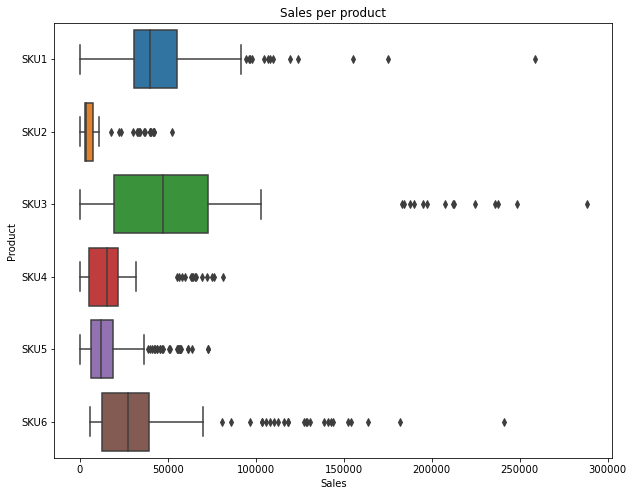

In [98]:
# cheking the distribution of sales for each product
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='Sales',y='Product')
plt.title('Sales per product')
plt.show()

The outliers seem genuine due to seasonality trend so they will remain in the data 

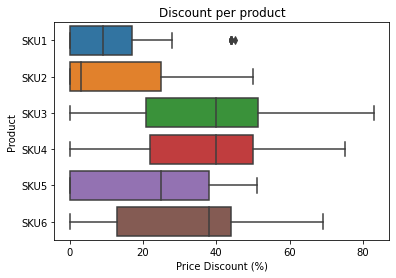

In [99]:
# checking for the distribution of discount per product
sns.boxplot(data=df,x='Price Discount (%)',y='Product')
plt.title('Discount per product')
plt.show()

The outliers seem genuine so they will remain in the data

#### Feature Engineering

* We will create new columns to help build the accuracy for the model
* The new columns will include:

Month

Year

Day of the week
 
Australian Day

Anzac Day

Seasons

In [100]:
# creating the month column
df['month']=df['date'].apply(lambda x: x.strftime('%b'))
# creating the year column
df['year']=df['date'].apply(lambda x: x.strftime('%Y'))
# creating the day of the week column
df['day']=df['date'].apply(lambda x: x.strftime('%A'))

In [101]:
# preview the data
df.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,VALENTINES,EASTER,CHRISTMAS,month,year,day
0,SKU1,2017-02-05,27750,0,0,0,0,0.0,0,0,0,0,Feb,2017,Sunday
1,SKU1,2017-02-12,29023,0,1,0,1,0.0,0,1,0,0,Feb,2017,Sunday
2,SKU1,2017-02-19,45630,17,0,0,0,0.0,0,0,0,0,Feb,2017,Sunday
3,SKU1,2017-02-26,26789,0,1,0,1,0.0,0,0,0,0,Feb,2017,Sunday
4,SKU1,2017-03-05,41999,17,0,0,0,0.0,0,0,0,0,Mar,2017,Sunday


In [102]:
# Knowing start time and end time for the data
from dateutil.relativedelta import relativedelta
df.sort_values(by='date',inplace=True)
StartDate=df['date'].iloc[0]
EndDate=df['date'].iloc[-1]
Duration_taken_in_days=EndDate - StartDate
difference=relativedelta(EndDate,StartDate)
# preview the data to know 
print(f'The date starts from {StartDate} to {EndDate}')
print('The duration for the sales is',difference.years,'years',difference.months,'months',difference.days,'days')

The date starts from 2017-02-05 00:00:00 to 2020-12-27 00:00:00
The duration for the sales is 3 years 10 months 22 days


In [103]:
df.tail()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,VALENTINES,EASTER,CHRISTMAS,month,year,day
611,SKU3,2020-12-27,0,74,1,0,1,-6.95,1,0,0,0,Dec,2020,Sunday
815,SKU4,2020-12-27,0,62,1,0,1,-6.95,1,0,0,0,Dec,2020,Sunday
407,SKU2,2020-12-27,0,21,0,0,0,-6.95,1,0,0,0,Dec,2020,Sunday
1019,SKU5,2020-12-27,0,23,0,0,0,-6.95,1,0,0,0,Dec,2020,Sunday
203,SKU1,2020-12-27,0,15,1,0,0,-6.95,1,0,0,0,Dec,2020,Sunday


In [104]:
df.tail()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,VALENTINES,EASTER,CHRISTMAS,month,year,day
611,SKU3,2020-12-27,0,74,1,0,1,-6.95,1,0,0,0,Dec,2020,Sunday
815,SKU4,2020-12-27,0,62,1,0,1,-6.95,1,0,0,0,Dec,2020,Sunday
407,SKU2,2020-12-27,0,21,0,0,0,-6.95,1,0,0,0,Dec,2020,Sunday
1019,SKU5,2020-12-27,0,23,0,0,0,-6.95,1,0,0,0,Dec,2020,Sunday
203,SKU1,2020-12-27,0,15,1,0,0,-6.95,1,0,0,0,Dec,2020,Sunday


In [105]:
# can we create a season column for all the seasons
# lets create a dictionary containing each month and its season
season={
    'January':'Summer',
    'February':'Summer',
    'March':'Autumn',
    'April': 'Autumn',
    'May':'Autumn',
    'June':'Winter',
    'July':'Winter',
    'August':'Winter',
    'September':'Spring',
    'October':'Spring',
    'November':'Spring',
    'December':'Summer'
}
df['Seasons']=df['date'].apply(lambda x: x.strftime('%B')).map(season)

In [106]:
df.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,VALENTINES,EASTER,CHRISTMAS,month,year,day,Seasons
0,SKU1,2017-02-05,27750,0,0,0,0,0.0,0,0,0,0,Feb,2017,Sunday,Summer
612,SKU4,2017-02-05,12835,30,0,1,1,0.0,0,0,0,0,Feb,2017,Sunday,Summer
408,SKU3,2017-02-05,39767,30,0,1,1,0.0,0,0,0,0,Feb,2017,Sunday,Summer
1020,SKU6,2017-02-05,32138,28,0,0,0,0.0,0,0,0,0,Feb,2017,Sunday,Summer
816,SKU5,2017-02-05,5229,0,0,0,0,0.0,0,0,0,0,Feb,2017,Sunday,Summer


In [107]:
# lets create the column for most popular holidays in Australia according to  McCrindle Research Pty Ltd 
# this shows the day of the holiday and two days close to the holiday
# Austrialia day
df['Australia_day'] =  df['date'].apply(lambda x: (x.strftime('%m-%d')== '01-26')|(x.strftime('%m-%d')=='01-27')|(x.strftime('%m-%d')=='01-25'))
# Anzac day
df['Anzac_day'] = df['date'].apply(lambda x: (x.strftime('%m-%d')== '04-25')|(x.strftime('%m-%d')=='04-26')|(x.strftime('%m-%d')=='04-24'))

In [108]:
df.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,VALENTINES,EASTER,CHRISTMAS,month,year,day,Seasons,Australia_day,Anzac_day
0,SKU1,2017-02-05,27750,0,0,0,0,0.0,0,0,0,0,Feb,2017,Sunday,Summer,False,False
612,SKU4,2017-02-05,12835,30,0,1,1,0.0,0,0,0,0,Feb,2017,Sunday,Summer,False,False
408,SKU3,2017-02-05,39767,30,0,1,1,0.0,0,0,0,0,Feb,2017,Sunday,Summer,False,False
1020,SKU6,2017-02-05,32138,28,0,0,0,0.0,0,0,0,0,Feb,2017,Sunday,Summer,False,False
816,SKU5,2017-02-05,5229,0,0,0,0,0.0,0,0,0,0,Feb,2017,Sunday,Summer,False,False


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1218 entries, 0 to 203
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Product             1218 non-null   object        
 1   date                1218 non-null   datetime64[ns]
 2   Sales               1218 non-null   int64         
 3   Price Discount (%)  1218 non-null   int32         
 4   In-Store Promo      1218 non-null   int32         
 5   Catalogue Promo     1218 non-null   int32         
 6   Store End Promo     1218 non-null   int32         
 7   Google_Mobility     1218 non-null   float64       
 8   Covid_Flag          1218 non-null   int32         
 9   VALENTINES          1218 non-null   int32         
 10  EASTER              1218 non-null   int32         
 11  CHRISTMAS           1218 non-null   int32         
 12  month               1218 non-null   object        
 13  year                1218 non-null   object       

In [110]:
#finding out the number of days used for sales
df['day'].value_counts() 

Sunday    1218
Name: day, dtype: int64

The day for sale was only on Sunday

## Data Analysis

The section is divided into analysis  and time series analysis
We will first look at:
* Distribution of sales
* Distribution of google mobility
* Distribution of Price Discount
* Total sales per year
* Total sales per month per year
* Average sales per month
* Total sales per season per year
* Average sales per season
* Total Sales per holiday per year
* Difference between Sales in covidflag and those without
* Heatmap for checking for multicollinearity
* line plot for google mobility
* Time Series visualizations:
     * 


#### Distributions

<AxesSubplot:xlabel='Sales', ylabel='Density'>

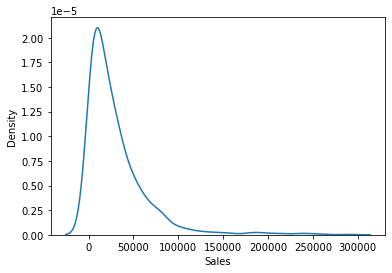

In [111]:
# distribution of sales
sns.kdeplot(data=df,x=df['Sales'])

The Sales column is skewed to the right due to seasonalities we will account for seasonality through seasonal decomposition

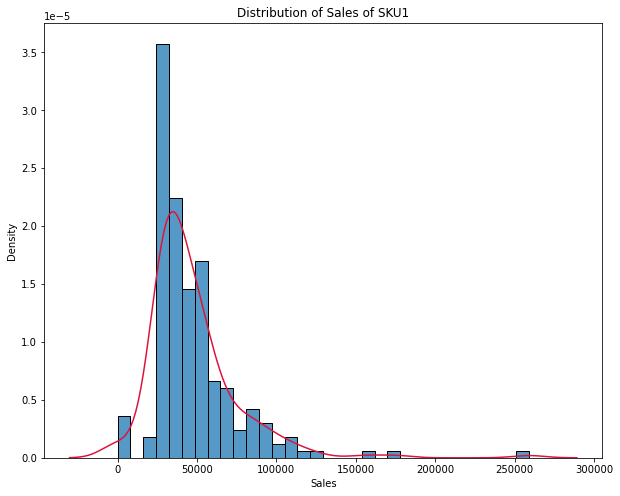

In [112]:
# distribution of sales of product SKU1
fig,ax=plt.subplots(figsize=(10,8))
ax=sns.histplot(data = df,x=(df['Sales'].loc[df['Product']=='SKU1']),kde=False,stat='density')
sns.kdeplot(data=df,x=(df['Sales'].loc[df['Product']=='SKU1']),ax=ax,color='crimson')
plt.title('Distribution of Sales of SKU1')
plt.show()

In [113]:
def distribute_product(product):
    """Creating a function to come up with the distribution
    for the products"""
    fig,ax=plt.subplots(figsize=(10,8))
    ax=sns.histplot(data=df,x=df['Sales'].loc[df['Product']==product],stat='density')
    sns.kdeplot(data=df,x=df['Sales'].loc[df['Product']==product],color='crimson',ax=ax)
    plt.title(f'Distribution of Sales of {product}')
    plt.show()

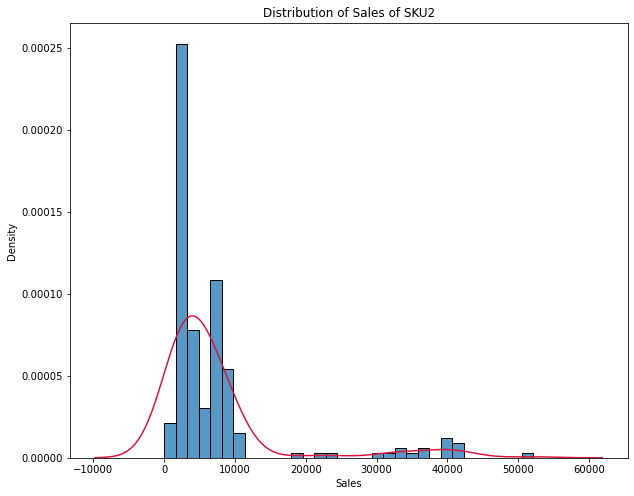

In [114]:
# plotting the distribution of sales of product SKU2
distribute_product('SKU2')

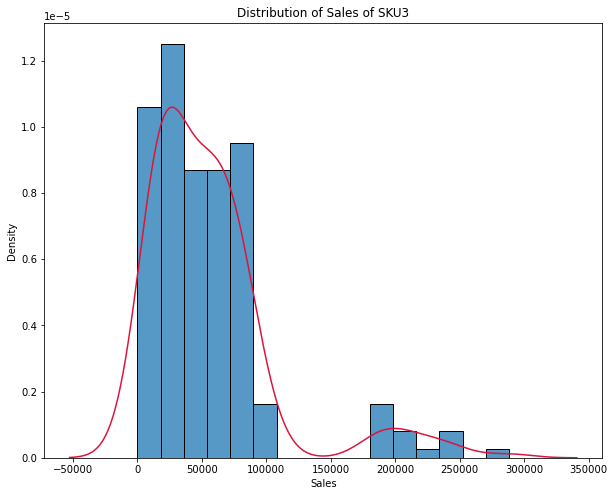

In [115]:
# plotting the distribution of Sales for product SKU3
distribute_product('SKU3')

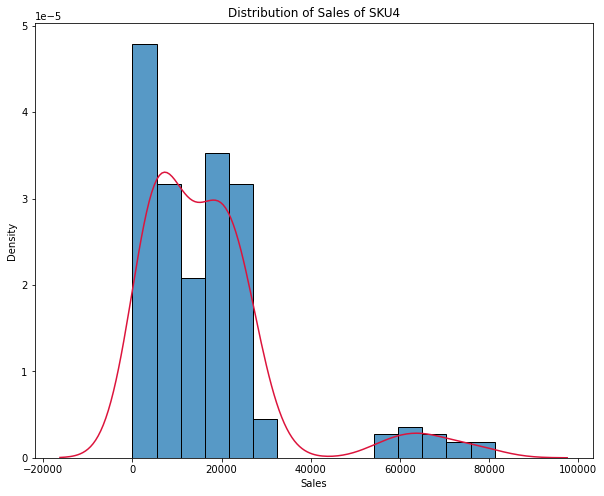

In [116]:
distribute_product('SKU4')

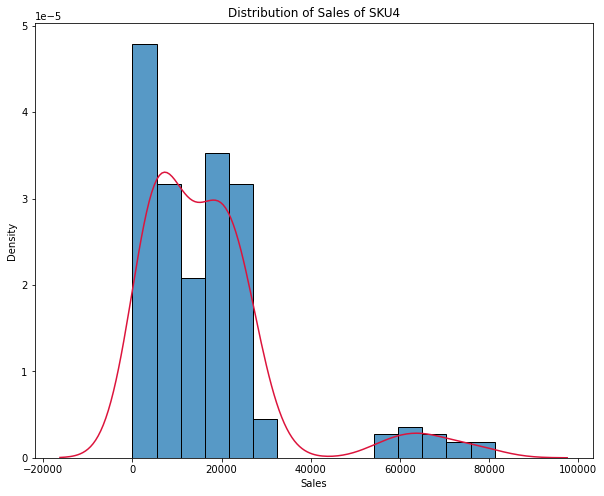

In [117]:
distribute_product('SKU4')

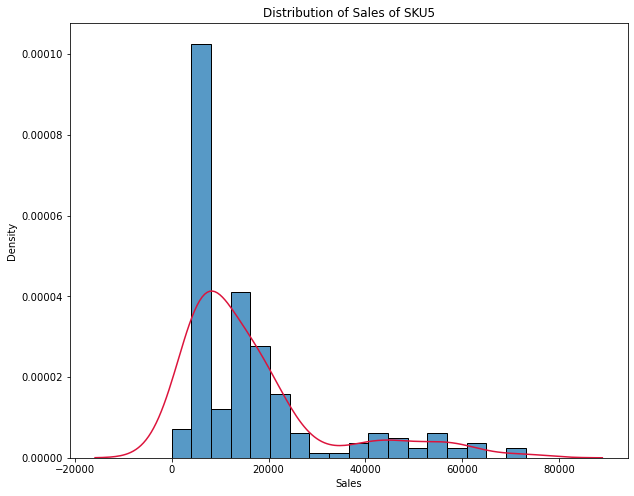

In [118]:
distribute_product('SKU5')

The data is skewed to right

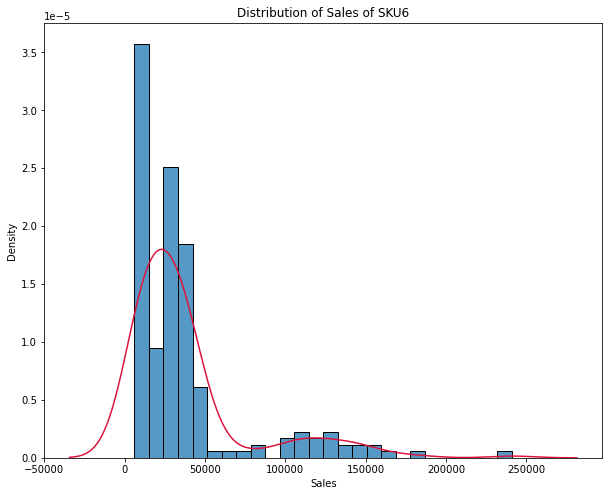

In [119]:
distribute_product('SKU6')

The data is skewed to the right

Text(0.5, 0, 'Years')

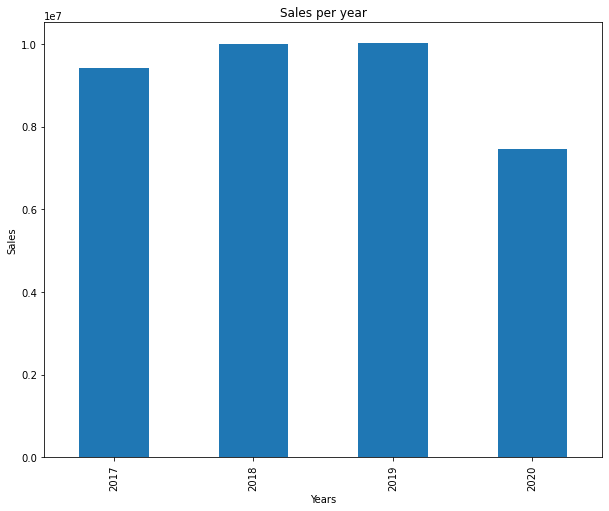

In [120]:
# lets create a barplot for the total sales per year
fig,ax=plt.subplots(figsize=(10,8))
ax=df.groupby('year')['Sales'].sum().plot(kind='bar')
ax.set_title('Sales per year')
ax.set_ylabel('Sales')
ax.set_xlabel('Years')

In [121]:
# lets create a barplot for total sales per product per year
new_data=df.groupby(['year','Product'])['Sales'].sum()

<AxesSubplot:xlabel='year', ylabel='Sales'>

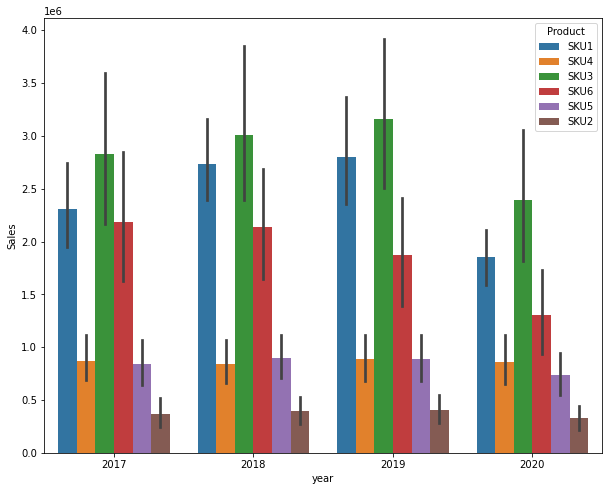

In [122]:
# creating a barplot for total sales per product per year
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(x='year',y='Sales',hue='Product',estimator=np.sum,data=df)

<AxesSubplot:xlabel='year'>

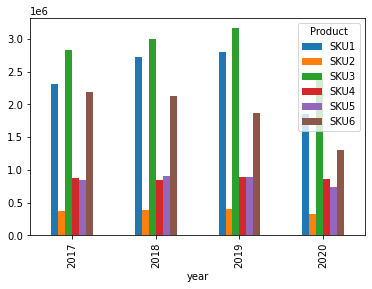

In [123]:
# ALTERNATIVE FOR THE ABOVE CODE USING matplotlib
df_product_pr_year=df.groupby(['year','Product'])['Sales'].sum()
df_product_pr_year.unstack().plot(kind='bar')

<AxesSubplot:xlabel='month'>

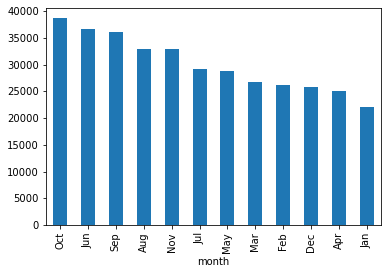

In [124]:
#calculating the average sales per month
df_month=df.groupby('month')['Sales'].mean().sort_values(ascending=False)
df_month.plot(kind='bar')

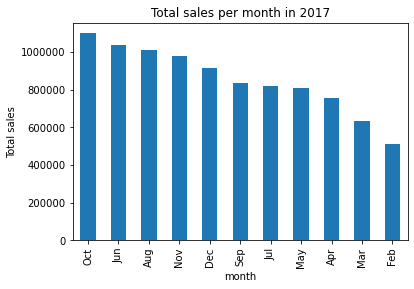

In [125]:
#Calculating the total sales per month per year
df_2017=df.loc[(df['year'] == '2017')].groupby('month')['Sales'].sum().sort_values(ascending=False)
df_2017.plot(kind='bar')
plt.title('Total sales per month in 2017')
plt.ylabel('Total sales')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

In [126]:
# creating a function to calculate the total sales per month of each year
def total_sale(year):
    """function for calculating the total sales for each year by month"""
    df_year=df.loc[(df['year'] == year)].groupby('month')['Sales'].sum().sort_values(ascending=False)
    df_year.plot(kind='bar')
    plt.title(f'Total sales per month in {year}')
    plt.ylabel('Total sales')
    plt.ticklabel_format(style='plain',axis='y')
    plt.show()

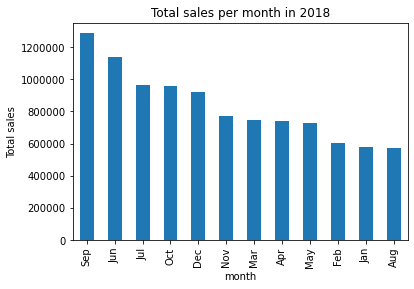

In [127]:
# calculating sales in 2018
total_sale('2018')

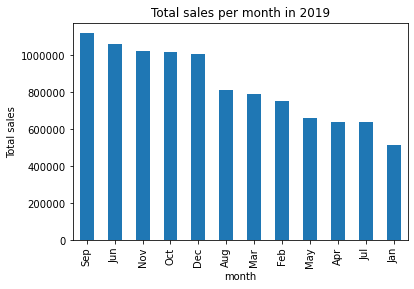

In [128]:
# calculating total sales in 2019
total_sale('2019')

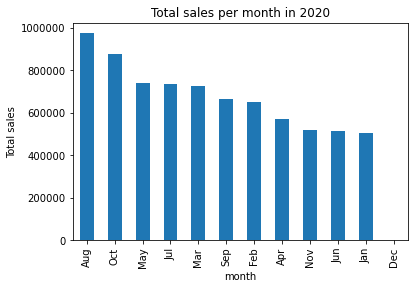

In [129]:
# calculating total sales in 2020
total_sale('2020')

In [130]:
# calculating total sales per season per year
# creating a function to show total sales per season
def season_sale(year):
    """function showing total sales per season
      in each year"""
    df_season=df.loc[df['year']== year].groupby('Seasons')['Sales'].sum().sort_values(ascending=False)
    df_season.plot(kind='bar')
    plt.ticklabel_format(style='plain',axis='y')
    plt.title(f'Sales per season in {year}')
    plt.ylabel('Total sales')
    plt.show()

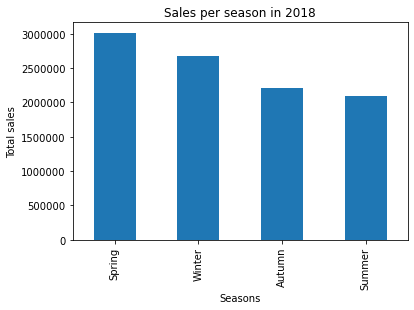

In [131]:
season_sale('2018')

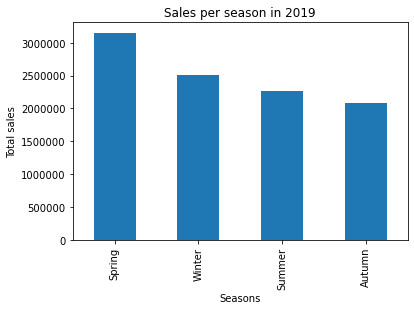

In [132]:
season_sale('2019')

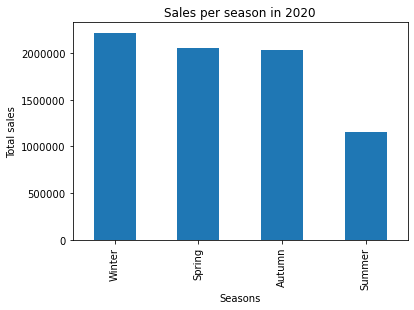

In [133]:
season_sale('2020')

In [134]:
# calculating total sales of a product per season in each year
# lets create a function showing total sales per season per product
def season_product(year):
    df_season2=df.loc[df['year']== year].groupby(['Seasons','Product'])['Sales'].sum()
    df_season2.unstack().plot(kind='bar')
    plt.ticklabel_format(style='plain',axis='y')
    plt.title(f'Sales per season in {year}')
    plt.ylabel('Total sales')
    plt.show()

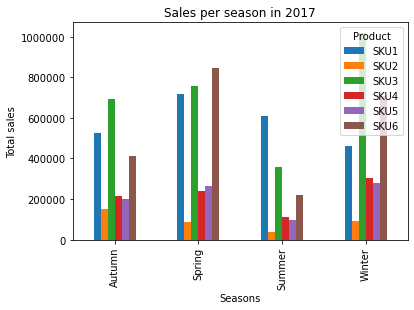

In [135]:
season_product('2017')

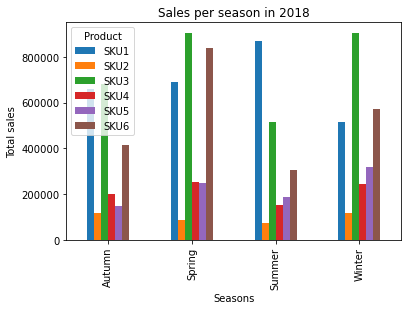

In [136]:
season_product('2018')

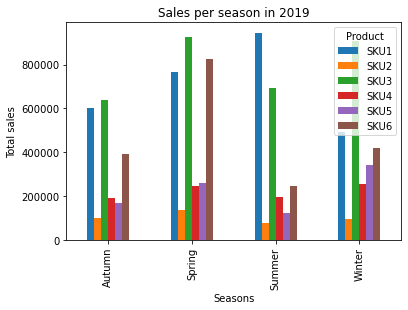

In [137]:
season_product('2019')

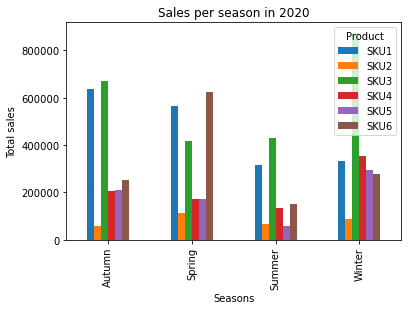

In [138]:
season_product('2020')

<AxesSubplot:xlabel='year'>

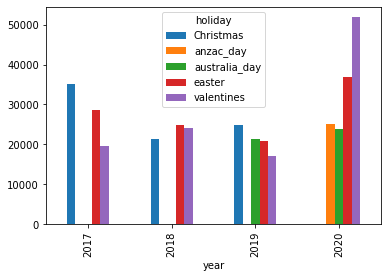

In [139]:
# lets find out the sales per holiday per year
df['holiday']='Normal day'
df.loc[(df['VALENTINES']==True),'holiday'] = 'valentines'
df.loc[(df['Anzac_day']==True),'holiday'] = 'anzac_day'
df.loc[(df['Australia_day']==True),'holiday'] = 'australia_day'
df.loc[(df['EASTER']==True),'holiday'] = 'easter'
df.loc[(df['CHRISTMAS']==True),'holiday'] = 'Christmas'

df_holidays=df.loc[df['holiday'] != 'Normal day']
df_holidays.groupby(['year','holiday'])['Sales'].mean().unstack().plot(kind='bar')


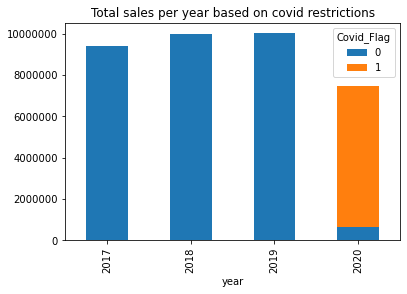

In [140]:
#showing the total sales per month in 2020
df.groupby(['year','Covid_Flag'])['Sales'].sum().unstack().plot(kind='bar',stacked=True)
plt.title('Total sales per year based on covid restrictions')
plt.ticklabel_format(style='plain',axis='y')
plt.show()


<AxesSubplot:xlabel='Google_Mobility', ylabel='Density'>

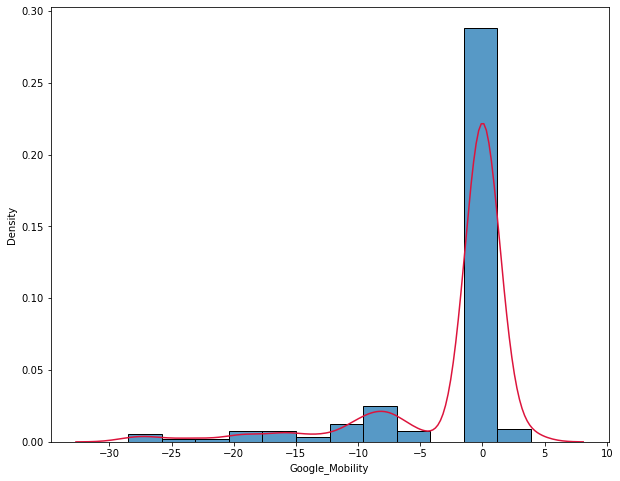

In [141]:
#plotting the distribution of google mobility
fig,ax=plt.subplots(figsize=(10,8))
sns.histplot(x='Google_Mobility',data=df,ax=ax,stat='density')
sns.kdeplot(x='Google_Mobility',data=df,ax=ax,color='crimson')

The data is skewed to the left

Text(0.5, 1.0, 'Movement of people based on google maps')

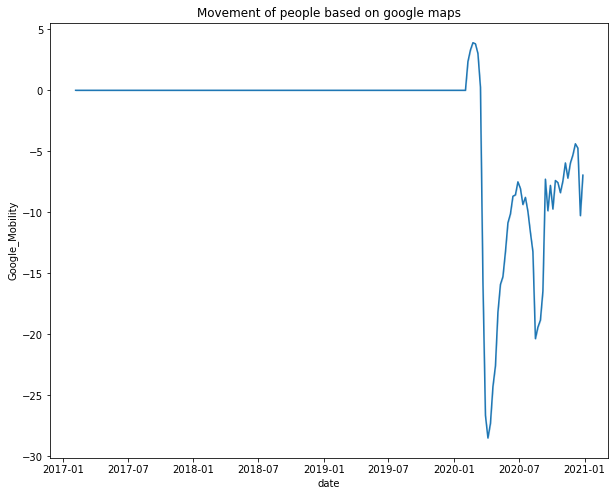

In [142]:
# lets create a lineplot for google mobility
fig,ax=plt.subplots(figsize=(10,8))
sns.lineplot(x=df['date'],y=df['Google_Mobility'],data=df)
ax.set_title('Movement of people based on google maps')

This shows that there is a decrease in movement of people between February 2020 to June 2020 followed by an increase in the movement of individuals there is also a decrease in the movement of people starting August 2020

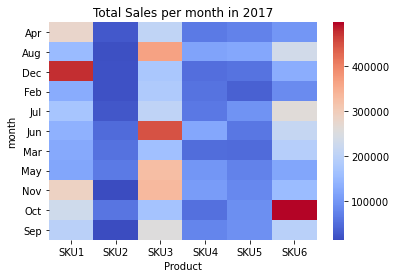

In [143]:
# showing the sales of products per month
sales_by_date=df.loc[(df['year']=='2017')].pivot_table(index='month',columns='Product',values='Sales',aggfunc='sum')
sns.heatmap(sales_by_date,cmap='coolwarm')
plt.title('Total Sales per month in 2017')
plt.show()

In [144]:
def month_sales(year,colors):
    """shows the total sales per month in
       various years """
    sales_by_date=df.loc[(df['year']== year)].pivot_table(index='month',columns='Product',values='Sales',aggfunc='sum')
    sns.heatmap(sales_by_date,cmap= colors)
    plt.title(f'Total Sales per month in {year}')
    plt.show()

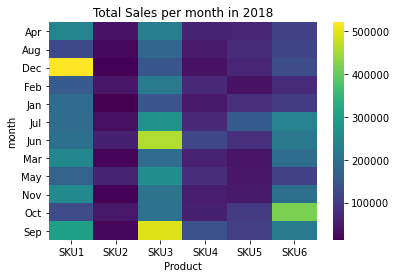

In [145]:
month_sales(year='2018',colors='viridis')

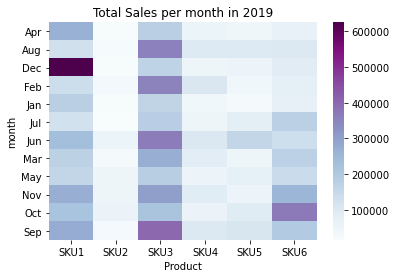

In [146]:
month_sales(year='2019',colors='BuPu')

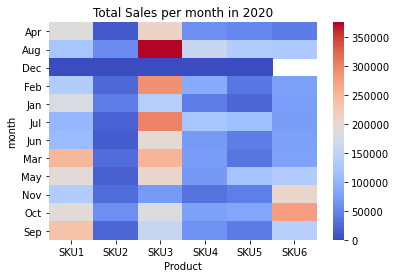

In [147]:
month_sales(year='2020',colors='coolwarm')

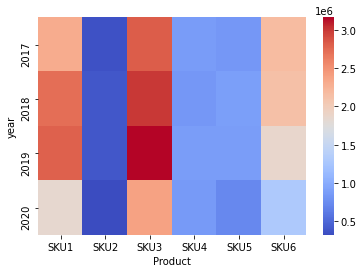

In [148]:
#plotting the sales per year
sales_by_year=df.pivot_table(index='year',columns='Product',values='Sales',aggfunc='sum')
sns.heatmap(sales_by_year,cmap='coolwarm')
plt.show()

### Time series analysis
* Line plot for each year separately
* Line plot for each year on the same graph
* Histogram for each year
* density plot for each year on the same graph
* Box and whisker plot for each year

<AxesSubplot:xlabel='date', ylabel='Sales'>

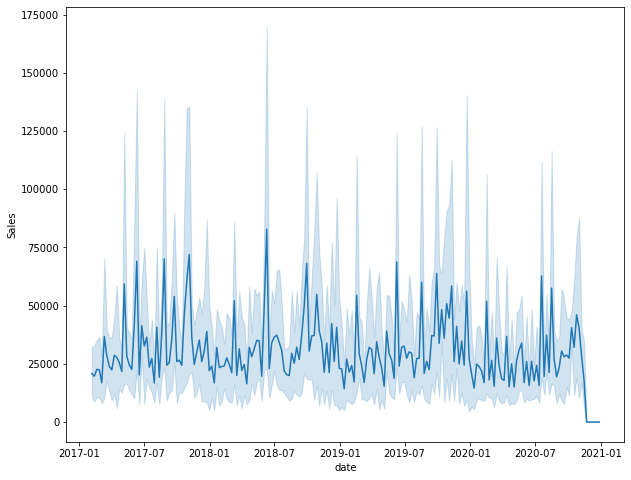

In [149]:
#creating a lineplot for sales of all products
fig,ax=plt.subplots(figsize=(10,8))
sns.lineplot(x=df['date'],y='Sales',ax=ax,data=df)

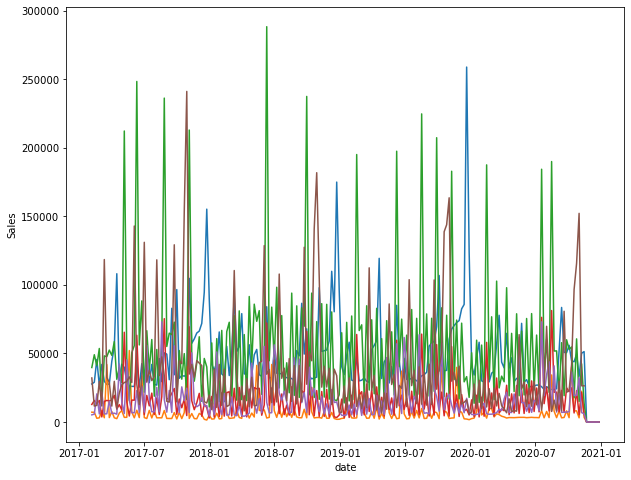

In [150]:
#creating a lineplot for each product
product=['SKU1','SKU2','SKU3','SKU4','SKU5','SKU6']
fig,ax=plt.subplots(figsize=(10,8))
for all in product:
    sns.lineplot(x='date',y='Sales',data=df.loc[df['Product']== all],legend=True)

In [151]:
year_group = df.loc[df['Product']=='SKU1'].set_index('date').groupby(pd.Grouper(freq='A'))
year_group1=year_group[['Sales']]
year_group1.head()


,Sales
date,
2017-02-05,27750
2017-02-12,29023
2017-02-19,45630
2017-02-26,26789
2017-03-05,41999
2018-01-07,41941
2018-01-14,37845
2018-01-21,43324
2018-01-28,65691


In [152]:
year_group1.tail()

,Sales
date,
2017-12-03,66333
2017-12-10,71917
2017-12-17,94633
2017-12-24,155253
2017-12-31,89706
2018-12-02,59037
2018-12-09,109917
2018-12-16,80431
2018-12-23,174994


#### Product SKU1

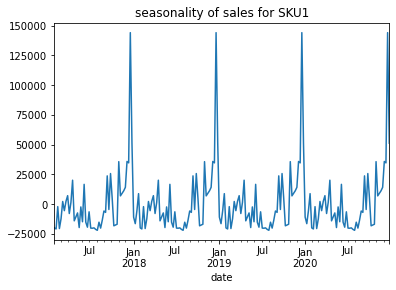

In [153]:
# plotting the seasonality of sales of SKU1
from statsmodels.tsa.seasonal import seasonal_decompose
season_df=df.loc[df['Product']=='SKU1'][['date','Sales']].set_index('date')
#season_df=season_df.asfreq('W')
season_decomp=seasonal_decompose(season_df)
season_decomp.seasonal.plot()
plt.title('seasonality of sales for SKU1')
plt.show()

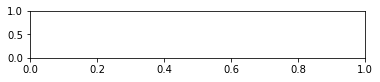

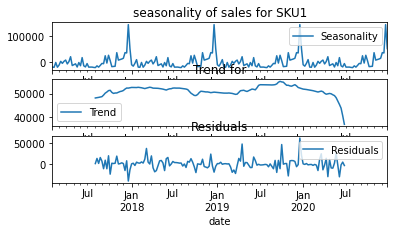

In [154]:
# creating a function for seasonal_decompose
# def plot_seasonal_decompose(product):
season_df=df.loc[df['Product']=='SKU1'][['date','Sales']].set_index('date')
season_decomp=seasonal_decompose(season_df)
# plotting the original timeseries
plt.subplot(411)
season_df.plot(label='Original')
plt.title('Original data')
plt.legend(loc='best')
# plotting the seasonality timeseries
plt.subplot(412)
season_decomp.seasonal.plot(label='Seasonality')
plt.title('seasonality of sales for SKU1')
plt.legend(loc='best')
# plotting the trend
plt.subplot(413)
season_decomp.trend.plot(label='Trend')
plt.legend(loc='best')
plt.title('Trend for')
# plotting the noise(residuals)
plt.subplot(414)
season_decomp.resid.plot(label='Residuals')
plt.title('Residuals')
plt.legend(loc='best')
plt.show()

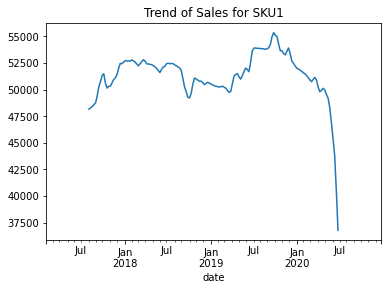

In [155]:
# plotting the trend of sales for SKU1
season_decomp.trend.plot()
plt.title('Trend of Sales for SKU1')
plt.show()

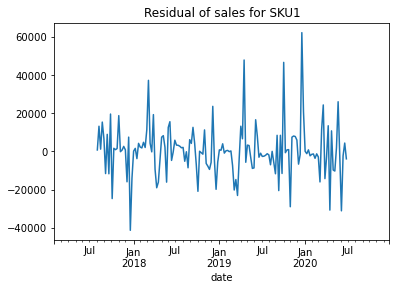

In [156]:
season_decomp.resid.plot()
plt.title('Residual of sales for SKU1')
plt.show()

In [157]:
# checking for stationarity
# alpha = 0.05
from statsmodels.tsa.stattools import adfuller
adf=adfuller(season_df)
adf_results=pd.Series(adf[0:4],index=['Test Statistic','p value','number of lags','number of observations'])
for key,value in adf[4].items():
    adf_results['Critical value (%s)'%key] = value

if adf_results['p value'] < 0.05:
    print('We reject the null hypothesis\nThe data is stationary')
elif adf_results['p_value'] > 0.05:
    print('Do not reject the null hypothesis\nconclude that the data is non stationary')

We reject the null hypothesis
The data is stationary


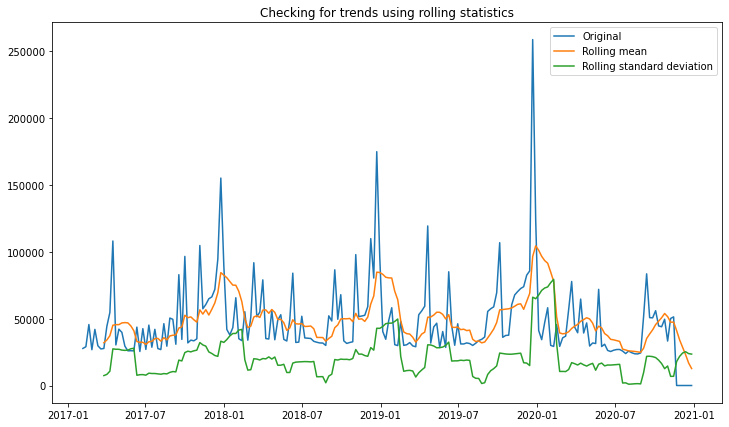

In [158]:
# checking for trends using the rolling means
roll_mean=season_df.rolling(window=8).mean()
roll_std=season_df.rolling(window=8).std()
fig,ax=plt.subplots(figsize=(12,7))
plt.plot(season_df,label='Original')
plt.plot(roll_mean,label='Rolling mean')
plt.plot(roll_std,label='Rolling standard deviation')
plt.legend(loc='best')
plt.title('Checking for trends using rolling statistics')
plt.show()

This shows that the data is stationary 

In [159]:
# creating a function for checking for statinarity
def stationarity_check():
    """Function for checking whether the timeseries 
       is stationary or non-stationary"""
    # plotting to check for trends
    roll_mean=season_df.rolling(window=8).mean()
    roll_std=season_df.rolling(window=8).std()
    fig,ax=plt.subplots(figsize=(12,7))
    plt.plot(season_df,label='Original')
    plt.plot(roll_mean,label='Rolling mean')
    plt.plot(roll_std,label='Rolling standard deviation')
    plt.legend(loc='best')
    plt.title('Checking for trends using rolling statistics')
    plt.show()
    # checking for stationarity
    # alpha = 0.05
    from statsmodels.tsa.stattools import adfuller
    adf=adfuller(season_df)
    adf_results=pd.Series(adf[0:4],index=['Test Statistic','p value','number of lags','number of observations'])
    for key,value in adf[4].items():
       adf_results['Critical value (%s)'%key] = value

    if adf_results['p value'] < 0.05:
       print('We reject the null hypothesis\nThe data is stationary')
    elif adf_results['p_value'] > 0.05:
       print('Do not reject the null hypothesis\nconclude that the data is non stationary')

In [160]:
### data preprocessing
# using one hot encoding on the product
from sklearn.preprocessing import OneHotEncoder
# instantiate the onehotencoder
ohe=OneHotEncoder()
# create the encoded column based on the profit columnn
df_en=ohe.fit_transform(df[['Seasons']])
# it is an sparse matrix lets create a new data
df_new=pd.DataFrame(df_en.toarray(),columns=ohe.get_feature_names(['Seasons']))
# lets join the data to be used in modelling
data=pd.concat([df.drop(['Seasons','month','day','year','holiday'],axis=1),df_new],axis=1)
data.head()


,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,VALENTINES,EASTER,CHRISTMAS,Australia_day,Anzac_day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,SKU1,2017-02-05,27750,0,0,0,0,0.0,0,0,0,0,False,False,0.0,0.0,1.0,0.0
1,SKU1,2017-02-12,29023,0,1,0,1,0.0,0,1,0,0,False,False,0.0,0.0,1.0,0.0
2,SKU1,2017-02-19,45630,17,0,0,0,0.0,0,0,0,0,False,False,0.0,0.0,1.0,0.0
3,SKU1,2017-02-26,26789,0,1,0,1,0.0,0,0,0,0,False,False,0.0,0.0,1.0,0.0
4,SKU1,2017-03-05,41999,17,0,0,0,0.0,0,0,0,0,False,False,0.0,0.0,1.0,0.0


In [161]:
# lets split the data to trainset and testset
# train set is between 2017-01 and 2020-07
train_set=data.sort_values('date',ascending=True).loc[df['date']<='2020-07']
# test set is after 2020-07
test_set=data.sort_values('date',ascending=True).loc[df['date']>'2020-07']

In [162]:
train_set.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,VALENTINES,EASTER,CHRISTMAS,Australia_day,Anzac_day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,SKU1,2017-02-05,27750,0,0,0,0,0.0,0,0,0,0,False,False,0.0,0.0,1.0,0.0
612,SKU4,2017-02-05,12835,30,0,1,1,0.0,0,0,0,0,False,False,0.0,0.0,1.0,0.0
408,SKU3,2017-02-05,39767,30,0,1,1,0.0,0,0,0,0,False,False,1.0,0.0,0.0,0.0
1020,SKU6,2017-02-05,32138,28,0,0,0,0.0,0,0,0,0,False,False,1.0,0.0,0.0,0.0
816,SKU5,2017-02-05,5229,0,0,0,0,0.0,0,0,0,0,False,False,0.0,1.0,0.0,0.0


In [163]:
#lets standardize the data
from sklearn.preprocessing import StandardScaler
#lets instantiate the scaler
scaler=StandardScaler()


### Modelling

In this section we will try out the following models:
 * ARIMA
 * ARIMAX
 * SARIMAX
 * Facebook Prophet


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU1 
 The mean squared error is 0.9993278500058492 
 The mean absolute error is 0.8135976230962475 



c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU2 
 The mean squared error is 0.9999582615683149 
 The mean absolute error is 0.6396082072612276 



c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU3 
 The mean squared error is 0.9889647346357234 
 The mean absolute error is 0.6783172534990527 



c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU4 
 The mean squared error is 0.9896156560348724 
 The mean absolute error is 0.685798074023722 



c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU5 
 The mean squared error is 0.99805622044093 
 The mean absolute error is 0.7823423973201182 



c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU6 
 The mean squared error is 1.001528951737358 
 The mean absolute error is 0.7825374271055147 

The average mean_squared_error for all the products is 0.9962419457371746 
 The average mean absolute error for all the products is 0.7303668303843138


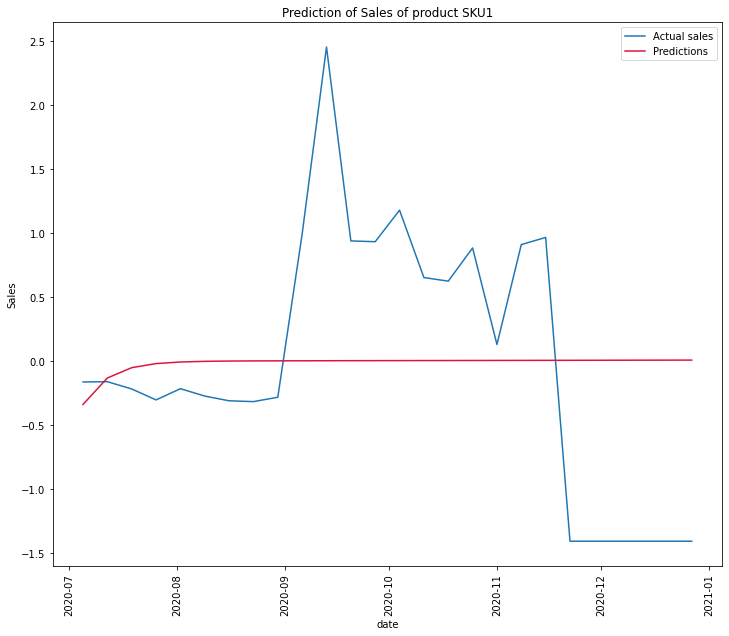

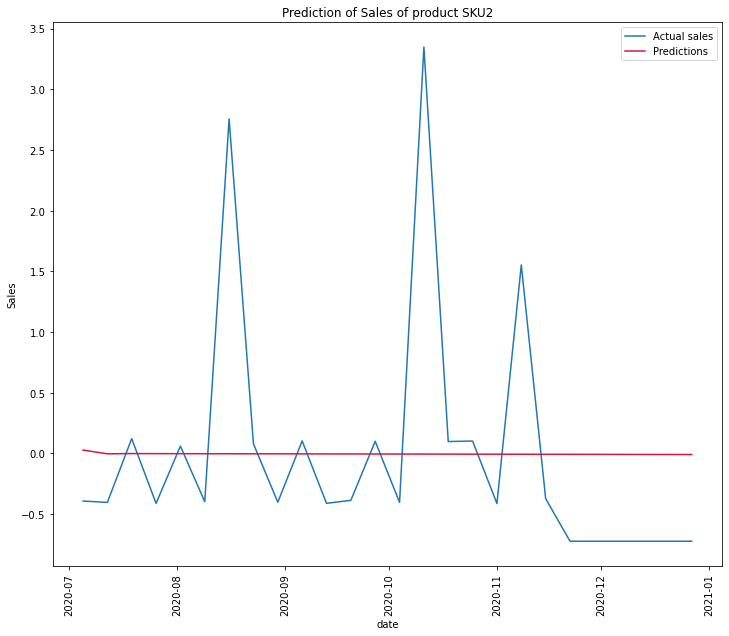

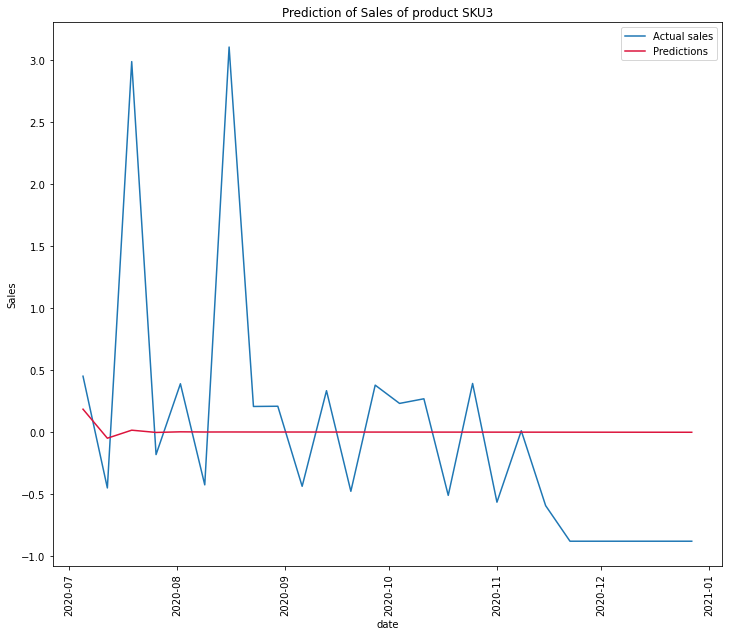

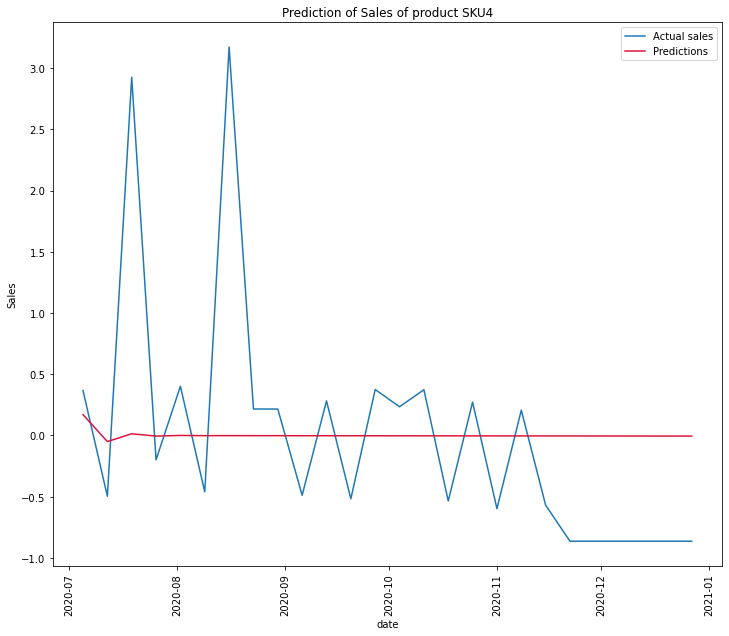

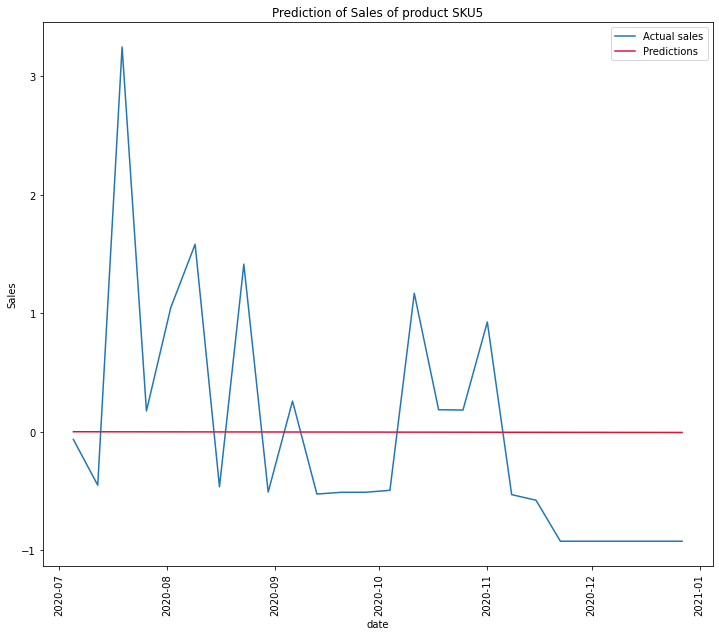

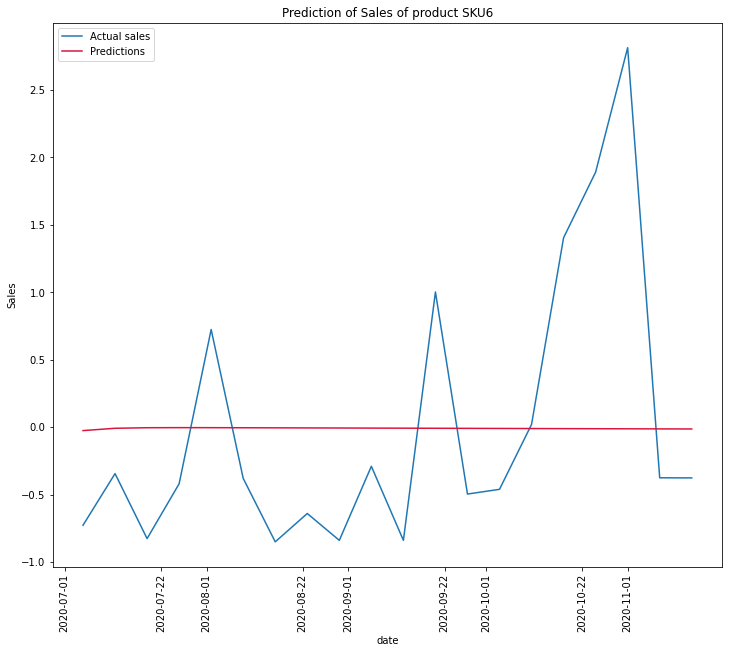

In [181]:
#import ARIMA model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
#creating a list of products
products=['SKU1','SKU2','SKU3','SKU4','SKU5','SKU6']
#creating the mean squared error,residual sum of squares error
mse=[]
mae=[]
r2_list=[]

for product in products:
    #Standardizing the training data
    pro_train=train_set.loc[train_set['Product']==product].set_index('date')
    scaled_pro_train=scaler.fit_transform(pro_train.drop('Product',axis=1))
    scaled_train_set=pd.DataFrame(data=scaled_pro_train,columns=pro_train.drop('Product',axis=1).columns,index=pro_train.index)
    #Standardizing the test data
    pro_test=test_set.loc[test_set['Product']==product].set_index('date')
    scaled_pro_test=scaler.fit_transform(pro_test.drop('Product',axis=1))
    scaled_test_set=pd.DataFrame(data=scaled_pro_test,columns=pro_test.drop('Product',axis=1).columns,index=pro_test.index)
    #Training the model 
    model=ARIMA(scaled_train_set['Sales'],order=(1,0,0),trend='t').fit()
    #lets predict using the model 
    start=scaled_test_set.index[0]
    end=scaled_test_set.index[-1] 
    sales_pred=model.predict(start=start,end=end)
    #lets unstandardize the data
    #sales_predd=scaler.inverse_transform(sales_pred)
    #lets plot the actual data and the forecasts
    fig,ax=plt.subplots(figsize=(12,10))
    sns.lineplot(y=scaled_test_set['Sales'],x=scaled_test_set.index,ax=ax,label='Actual sales')
    sns.lineplot(y=sales_pred,x=scaled_test_set.index,ax=ax,color='crimson',label='Predictions')
    plt.title(f'Prediction of Sales of product {product}')
    plt.xticks(rotation=90)
    plt.legend()
    #lets evaluate the model
    #calculating the mean_squared_error
    mean_s_e=mean_squared_error(scaled_test_set['Sales'],sales_pred)
    mse.append(mean_s_e) 
    #calculating the mean_absolute_error
    mean_a_e=mean_absolute_error(scaled_test_set['Sales'],sales_pred)
    mae.append(mean_a_e)
    #calculating the explained variance
    r2=r2_score(scaled_test_set['Sales'],sales_pred)
    r2_list.append(r2)
    print(f'{product} \n The mean squared error is {mean_s_e} \n The mean absolute error is {mean_a_e} \n')
print(f'The average mean_squared_error for all the products is {np.mean(mse)} \n The average mean absolute error for all the products is {np.mean(mae)}') 

c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU1 
 The mean squared error is 0.7997393980256351 
 The mean absolute error is 0.7448304341989894 



c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SKU2 
 The mean squared error is 0.4476651941461744 
 The mean absolute error is 0.583346925267237 



c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU3 
 The mean squared error is 0.7934932200340301 
 The mean absolute error is 0.6627326157359138 



c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU4 
 The mean squared error is 0.8928205553662013 
 The mean absolute error is 0.6968207147611332 



c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU5 
 The mean squared error is 0.5473176395426526 
 The mean absolute error is 0.5908058836640916 



c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU6 
 The mean squared error is 0.44024035221683 
 The mean absolute error is 0.4941583609073887 

The average mean_squared_error for all the products is 0.6535460598885873 
 The average mean absolute error for all the products is 0.6287824890891256


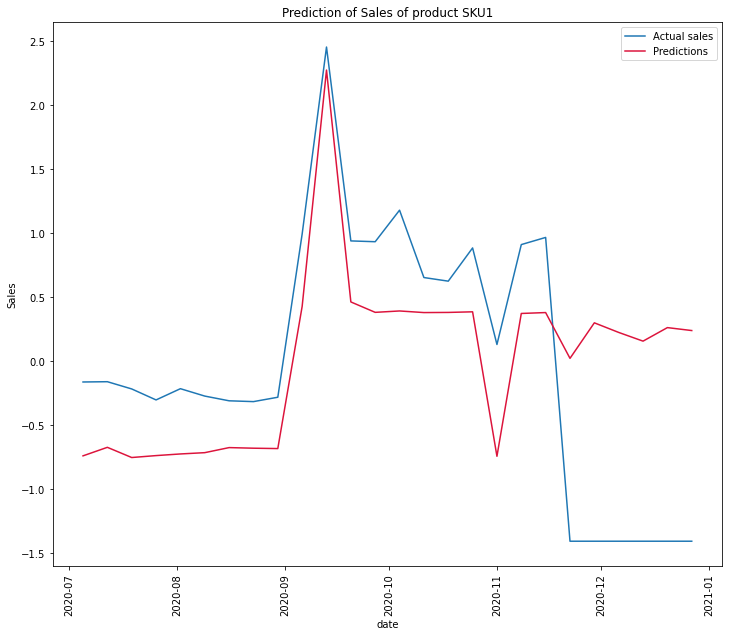

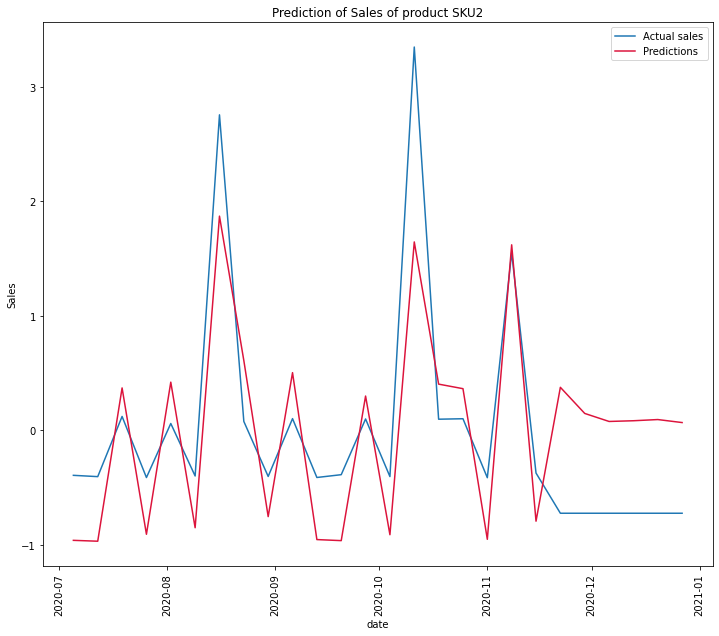

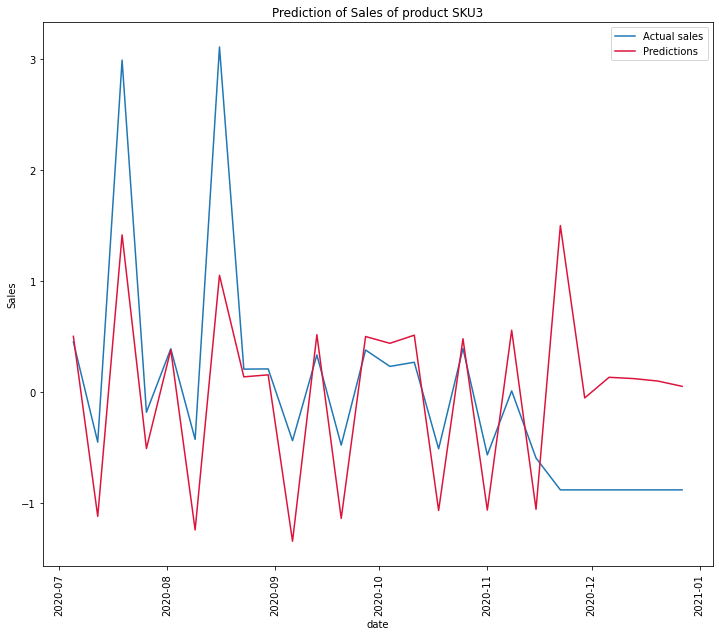

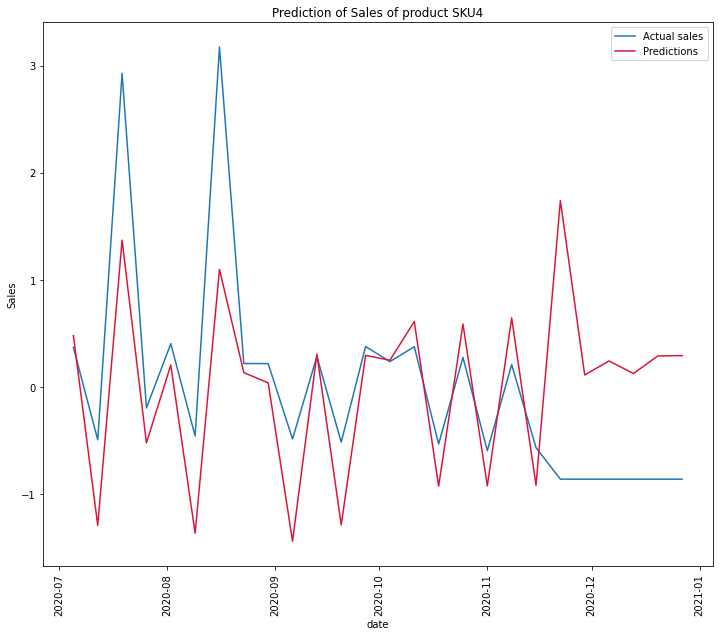

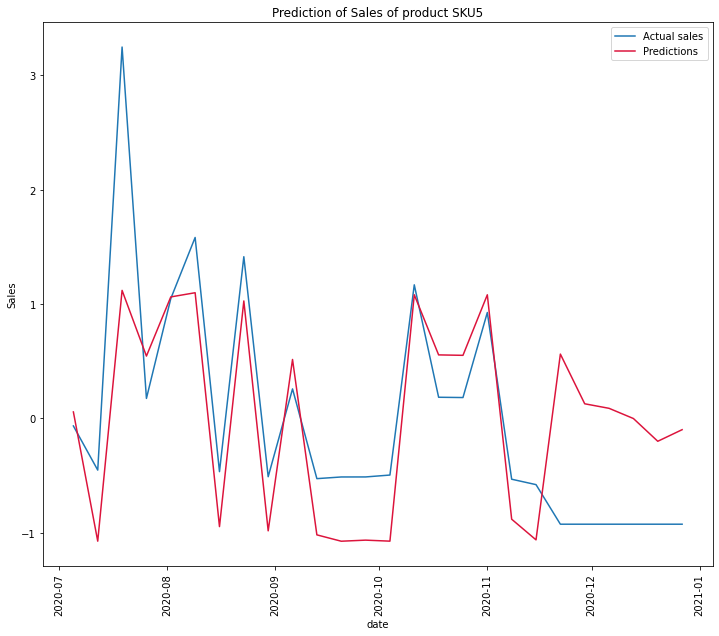

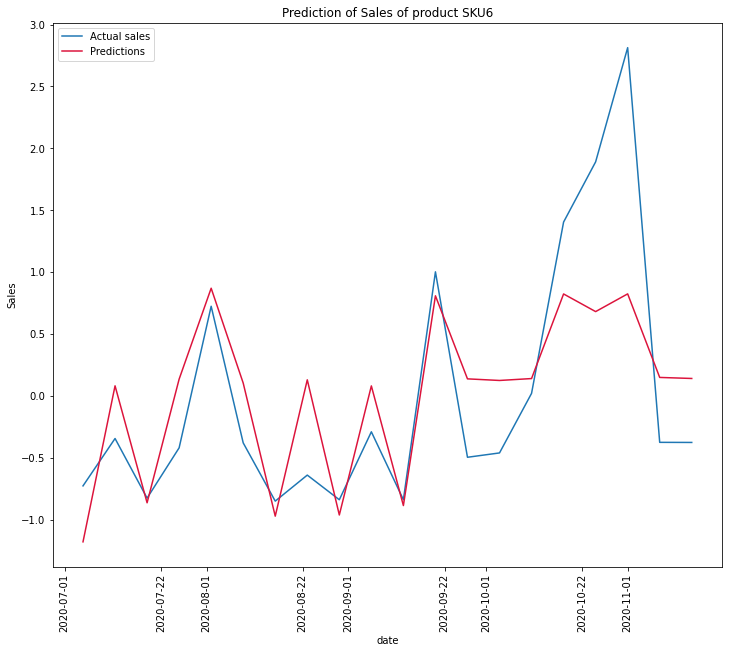

In [164]:
#import ARIMA model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
#creating a list of products
products=['SKU1','SKU2','SKU3','SKU4','SKU5','SKU6']
#creating the mean squared error,residual sum of squares error
mse=[]
mae=[]
r2_list=[]

for product in products:
    #Standardizing the training data
    pro_train=train_set.loc[train_set['Product']==product].set_index('date')
    scaled_pro_train=scaler.fit_transform(pro_train.drop('Product',axis=1))
    scaled_train_set=pd.DataFrame(data=scaled_pro_train,columns=pro_train.drop('Product',axis=1).columns,index=pro_train.index)
    #Standardizing the test data
    pro_test=test_set.loc[test_set['Product']==product].set_index('date')
    scaled_pro_test=scaler.fit_transform(pro_test.drop('Product',axis=1))
    scaled_test_set=pd.DataFrame(data=scaled_pro_test,columns=pro_test.drop('Product',axis=1).columns,index=pro_test.index)
    #Training the model 
    model=ARIMA(scaled_train_set['Sales'],order=(1,0,0),exog=scaled_train_set[['Price Discount (%)','Google_Mobility','Covid_Flag','VALENTINES','EASTER','CHRISTMAS','Seasons_Autumn','Seasons_Spring','Seasons_Summer','Seasons_Winter']],trend='t').fit()
    #lets predict using the model 
    start=scaled_test_set.index[0]
    end=scaled_test_set.index[-1] 
    sales_pred=model.predict(start=start,end=end,exog=scaled_test_set[['Price Discount (%)','Google_Mobility','Covid_Flag','VALENTINES','EASTER','CHRISTMAS','Seasons_Autumn','Seasons_Spring','Seasons_Summer','Seasons_Winter']])
    #lets unstandardize the data
    #sales_predd=scaler.inverse_transform(sales_pred)
    #lets plot the actual data and the forecasts
    fig,ax=plt.subplots(figsize=(12,10))
    sns.lineplot(y=scaled_test_set['Sales'],x=scaled_test_set.index,ax=ax,label='Actual sales')
    sns.lineplot(y=sales_pred,x=scaled_test_set.index,ax=ax,color='crimson',label='Predictions')
    plt.title(f'Prediction of Sales of product {product}')
    plt.xticks(rotation=90)
    plt.legend()
    #lets evaluate the model
    #calculating the mean_squared_error
    mean_s_e=mean_squared_error(scaled_test_set['Sales'],sales_pred)
    mse.append(mean_s_e) 
    #calculating the mean_absolute_error
    mean_a_e=mean_absolute_error(scaled_test_set['Sales'],sales_pred)
    mae.append(mean_a_e)
    #calculating the explained variance
    r2=r2_score(scaled_test_set['Sales'],sales_pred)
    r2_list.append(r2)
    print(f'{product} \n The mean squared error is {mean_s_e} \n The mean absolute error is {mean_a_e} \n')
print(f'The average mean_squared_error for all the products is {np.mean(mse)} \n The average mean absolute error for all the products is {np.mean(mae)}')   
    


    
   


In [165]:
pro_test.tail()

,Product,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,VALENTINES,EASTER,CHRISTMAS,Australia_day,Anzac_day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
date,,,,,,,,,,,,,,,,,
2020-10-18,SKU6,96619,54,0,1,0,-7.56,1,0,0,0,False,False,0.0,0.0,1.0,0.0
2020-10-25,SKU6,115798,52,0,1,0,-8.39,1,0,0,0,False,False,0.0,0.0,1.0,0.0
2020-11-01,SKU6,152186,54,1,0,1,-7.43,1,0,0,0,False,False,0.0,0.0,1.0,0.0
2020-11-08,SKU6,26445,44,1,0,1,-5.95,1,0,0,0,False,False,0.0,0.0,1.0,0.0
2020-11-15,SKU6,26414,44,0,0,0,-7.20,1,0,0,0,False,False,0.0,0.0,1.0,0.0


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-

The average mae for all products 31642.636476014777


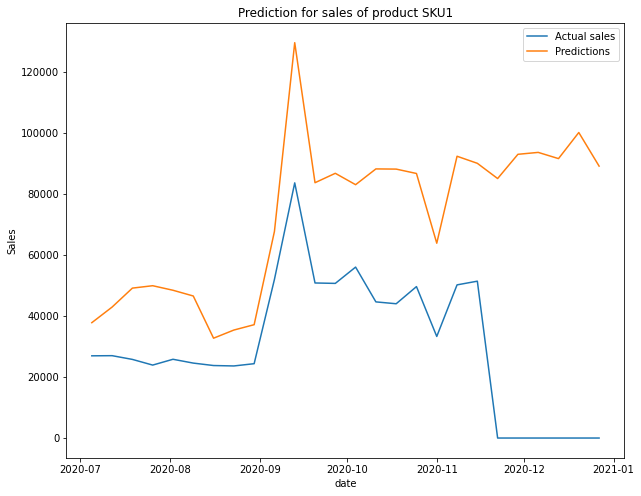

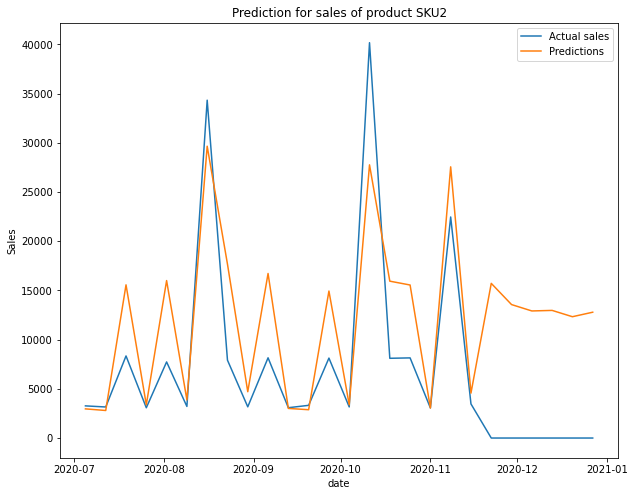

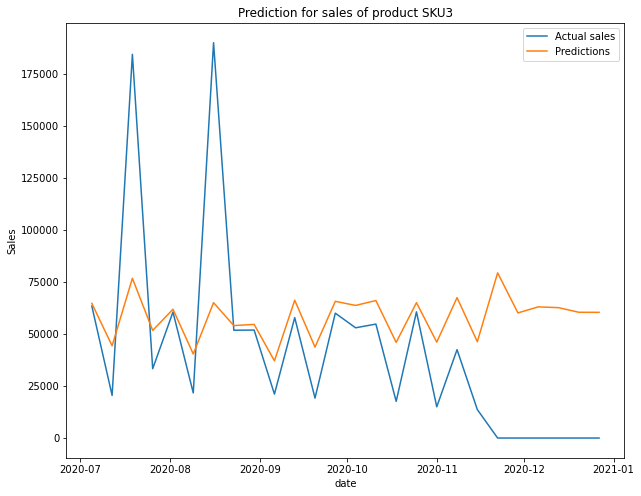

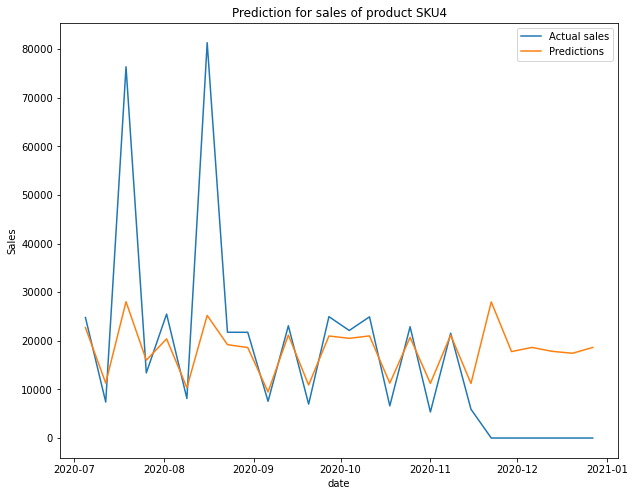

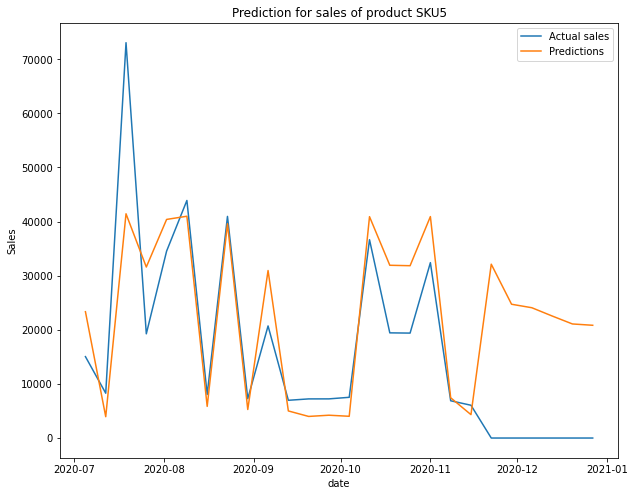

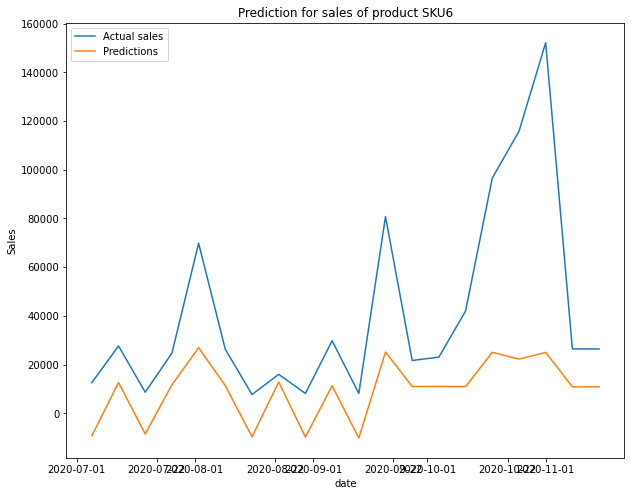

In [167]:
#using the SARIMAX model
import statsmodels.api as sm
for product in products:
    pro_train=train_set.loc[train_set['Product']==product].set_index('date')
    pro_test=test_set.loc[test_set['Product']==product].set_index('date')
    sarimax_mae=[]
    sarimax_mse=[]
    sarimax_r2_score=[]
    model=sm.tsa.statespace.SARIMAX(pro_train['Sales'],order=(1,0,0),exog=pro_train[['Price Discount (%)','Google_Mobility','Covid_Flag','VALENTINES','EASTER','CHRISTMAS']],trend='t').fit()
    sales_pred_sarimax=model.forecast(steps=len(pro_test),exog=pro_test[['Price Discount (%)','Google_Mobility','Covid_Flag','VALENTINES','EASTER','CHRISTMAS']])
    #create the visualizations for the sarimax model
    fig,ax=plt.subplots(figsize=(10,8))
    sns.lineplot(x=pro_test.index,y=pro_test['Sales'],label='Actual sales',ax=ax)
    sns.lineplot(x=pro_test.index,y=sales_pred_sarimax,label='Predictions')
    plt.legend()
    plt.title(f"Prediction for sales of product {product}")
    #evaluating the model
    sarimax_mae.append(mean_absolute_error(pro_test['Sales'],sales_pred_sarimax))
    sarimax_mse.append(mean_squared_error(pro_test['Sales'],sales_pred_sarimax))
    sarimax_r2_score.append(r2_score(pro_test['Sales'],sales_pred_sarimax))
print(f"The average mae for all products {np.mean(sarimax_mae)}")

In [ ]:

#Tuning the SARIMAX model
import statsmodels.api as sm
param_grid={'order':[(p,d,q)for p in range(3) for d in range(3) for q in range(3)],
            'seasonal_order':[(P,D,Q,s)for P in range(3) for D in range(3) for Q in range(3) for s in [12,4,7,24]] }
model_x=sm.tsa.statespace.SARIMAX(endog=scaled_train_set['Sales'],order=(1,0,0),seasonal_order=(1,0,0,7),exog=scaled_train_set[['Price Discount (%)','Google_Mobility','Covid_Flag','VALENTINES','EASTER','CHRISTMAS']])
#instantiate a wrapped model
wrap_modelx=SarimaxWrapper(model_x)
#instantiate a gridsearch object
grid_max=GridSearchCV(estimator=wrap_modelx,param_grid=param_grid)
#fit the model
grid_model=grid_max.fit(scaled_train_set['Sales'])

In [168]:
#using the Facebook prophet model
from fbprophet import Prophet
#creating the mean squared error,residual sum of squares error
fb_mse=[]
fb_mae=[]
fb_r2_list=[]

for product in products:
    pro_train=train_set.loc[train_set['Product']==product].set_index('date')
    pro_test=test_set.loc[test_set['Product']==product].set_index('date')
    #creating an instance of the model 
    model=Prophet()
    data=pro_train.reset_index()[['date','Sales']]
    data=data.rename(columns={'date':'ds','Sales':'y'})
    model.fit(data)
    #making predictions using facebook prophet
    test_dates=pro_test.reset_index()[['date']].rename(columns={'date':'ds'})
    sales_pred=model.predict(test_dates)
    #evaluating the model
    mean_s_e=mean_squared_error(pro_test['Sales'],sales_pred['yhat'])
    mean_a_e=mean_absolute_error(pro_test['Sales'],sales_pred['yhat'])
    r2=r2_score(pro_test['Sales'],sales_pred['yhat'])
    
    fb_mse.append(mean_s_e)
    fb_mae.append(mean_a_e)
    fb_r2_list.append(r2)

    print(f'{product} \n The mean squared error is {mean_s_e} \n The mean absolute error is {mean_a_e} \n')
print(f'The average mean_squared_error for all the products is {np.mean(fb_mse)} \n The average mean absolute error for all the products is {np.mean(fb_mae)}')   
    



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU1 
 The mean squared error is 2700190186.5425234 
 The mean absolute error is 33857.97331441958 



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU2 
 The mean squared error is 93970126.48564388 
 The mean absolute error is 5604.088944257509 



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU3 
 The mean squared error is 2244965816.4749117 
 The mean absolute error is 38271.35027147458 



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU4 
 The mean squared error is 362411840.0199462 
 The mean absolute error is 12273.228741932944 



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


SKU5 
 The mean squared error is 304794042.8059368 
 The mean absolute error is 14352.896383703208 



INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU6 
 The mean squared error is 557236672.3674724 
 The mean absolute error is 19609.51798698771 

The average mean_squared_error for all the products is 1043928114.1160723 
 The average mean absolute error for all the products is 20661.50927379592


In [170]:
exog=scaled_train_set[['Price Discount (%)','Google_Mobility',
                                                               'Covid_Flag','VALENTINES','EASTER',
                                                               'CHRISTMAS']]

In [173]:
#Tuning the facebook prophet model with exogenous variables
#creating the mean squared error,residual sum of squares error
fbx_mse=[]
fbx_mae=[]
fbx_r2_list=[]

for product in products:
    pro_train=train_set.loc[train_set['Product']==product].set_index('date')
    pro_test=test_set.loc[test_set['Product']==product].set_index('date')
#instantiate the model    
    modelx=Prophet()
    for exo in exog.columns:
        modelx.add_regressor(exo)
    datax=pro_train.reset_index().rename(columns={'Sales':'y','date':'ds'})[['ds','y','Price Discount (%)','In-Store Promo','Catalogue Promo','Store End Promo','Google_Mobility','Covid_Flag','VALENTINES','EASTER','CHRISTMAS']]    
    modelx.fit(datax)
    future_dates=pro_test.reset_index()[['date','Price Discount (%)','In-Store Promo','Catalogue Promo','Store End Promo','Google_Mobility','Covid_Flag','VALENTINES','EASTER','CHRISTMAS']].rename(columns={'date':'ds'})    
    salesx_pred=modelx.predict(future_dates)
    mean_s_e_x=mean_squared_error(pro_test['Sales'],salesx_pred['yhat'])
    meanx_a_e=mean_absolute_error(pro_test['Sales'],salesx_pred['yhat'])
    r2x=r2_score(pro_test['Sales'],salesx_pred['yhat'])
    
    fbx_mse.append(mean_s_e_x)
    fbx_mae.append(meanx_a_e)
    fbx_r2_list.append(r2x)

    print(f'{product} \n The mean squared error is {mean_s_e_x} \n The mean absolute error is {meanx_a_e} \n')
print(f'The average mean_squared_error for all the products is {np.mean(fbx_mse)} \n The average mean absolute error for all the products is {np.mean(fbx_mae)}')   
    



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU1 
 The mean squared error is 2129909709.0975773 
 The mean absolute error is 28869.388582061358 



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU2 
 The mean squared error is 51806847.42549309 
 The mean absolute error is 5715.047615823201 



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU3 
 The mean squared error is 2398705217.733566 
 The mean absolute error is 40913.411622569074 



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU4 
 The mean squared error is 313827649.59004253 
 The mean absolute error is 12338.160438987306 



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU5 
 The mean squared error is 146358043.60255703 
 The mean absolute error is 7973.907013183451 

SKU6 
 The mean squared error is 375872261.6883582 
 The mean absolute error is 14623.43977976863 

The average mean_squared_error for all the products is 902746621.5229322 
 The average mean absolute error for all the products is 18405.559175398837


In [176]:
#Tuning facebook prophet model
#change the seasonality_prior_scale to 20
#and change_point_prior_scale to improve the flexibility of the model
Tuned_mae=[]
Tuned_mse=[]
Tuned_r2=[]

for product in products:
    pro_train=train_set.loc[train_set['Product']==product].set_index('date')
    pro_test=test_set.loc[test_set['Product']==product].set_index('date')
#instantiate the model    
    model_tune=Prophet(seasonality_prior_scale=20,changepoint_prior_scale=0.1)
    for exo in exog.columns:
        model_tune.add_regressor(exo)
    datat=pro_train.reset_index().rename(columns={'Sales':'y','date':'ds'})[['ds','y','Price Discount (%)','In-Store Promo','Catalogue Promo','Store End Promo','Google_Mobility','Covid_Flag','VALENTINES','EASTER','CHRISTMAS']]    
    model_tune.fit(datat)
    future_dates=pro_test.reset_index()[['date','Price Discount (%)','In-Store Promo','Catalogue Promo','Store End Promo','Google_Mobility','Covid_Flag','VALENTINES','EASTER','CHRISTMAS']].rename(columns={'date':'ds'})    
    salest_pred=model_tune.predict(future_dates)
    Tuned_meansex=mean_squared_error(pro_test['Sales'],salest_pred['yhat'])
    Tuned_meanxae=mean_absolute_error(pro_test['Sales'],salest_pred['yhat'])
    Tuned_r2x=r2_score(pro_test['Sales'],salest_pred['yhat'])
    
    Tuned_mse.append(Tuned_meansex)
    Tuned_mae.append(Tuned_meanxae)
    Tuned_r2.append(Tuned_r2x)

    print(f'{product} \n The mean squared error is {Tuned_meansex} \n The mean absolute error is {Tuned_meanxae} \n')
print(f'The average mean_squared_error for all the products is {np.mean(Tuned_mse)} \n The average mean absolute error for all the products is {np.mean(Tuned_mae)}') 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU1 
 The mean squared error is 2146469952.9965959 
 The mean absolute error is 28912.917562192582 



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU2 
 The mean squared error is 50477019.284469396 
 The mean absolute error is 5666.675658058408 



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU3 
 The mean squared error is 2163936336.2655582 
 The mean absolute error is 38069.917730314366 

SKU4 
 The mean squared error is 305562179.08780104 
 The mean absolute error is 12027.504350767484 



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU5 
 The mean squared error is 142372309.90969002 
 The mean absolute error is 7818.417748101541 

SKU6 
 The mean squared error is 358397271.9739225 
 The mean absolute error is 14118.498463753338 

The average mean_squared_error for all the products is 861202511.5863395 
 The average mean absolute error for all the products is 17768.988585531286


In [178]:
#more tuning on the facebook prophet model
#Tuning facebook prophet model
#change the seasonality_prior_scale to 20
#change seasonality_mode to multiplicative
#and change_point_prior_scale to improve the flexibility of the model
Tuned_mae2=[]
Tuned_mse2=[]
Tuned2_r2=[]

for product in products:
    pro_train=train_set.loc[train_set['Product']==product].set_index('date')
    pro_test=test_set.loc[test_set['Product']==product].set_index('date')
#instantiate the model    
    model_tune2=Prophet(seasonality_prior_scale=20,changepoint_prior_scale=0.1,seasonality_mode='multiplicative')
    for exo in exog.columns:
        model_tune2.add_regressor(exo)
    datat=pro_train.reset_index().rename(columns={'Sales':'y','date':'ds'})[['ds','y','Price Discount (%)','In-Store Promo','Catalogue Promo','Store End Promo','Google_Mobility','Covid_Flag','VALENTINES','EASTER','CHRISTMAS']]    
    model_tune2.fit(datat)
    future_dates=pro_test.reset_index()[['date','Price Discount (%)','In-Store Promo','Catalogue Promo','Store End Promo','Google_Mobility','Covid_Flag','VALENTINES','EASTER','CHRISTMAS']].rename(columns={'date':'ds'})    
    salest2_pred=model_tune2.predict(future_dates)
    Tuned_meansex2=mean_squared_error(pro_test['Sales'],salest2_pred['yhat'])
    Tuned_meanxae2=mean_absolute_error(pro_test['Sales'],salest2_pred['yhat'])
    Tuned2_r2x=r2_score(pro_test['Sales'],salest2_pred['yhat'])
    
    Tuned_mse2.append(Tuned_meansex2)
    Tuned_mae2.append(Tuned_meanxae2)
    Tuned2_r2.append(Tuned2_r2x)

    print(f'{product} \n The mean squared error is {Tuned_meansex2} \n The mean absolute error is {Tuned_meanxae2} \n The goodness of fit is {Tuned2_r2x}')
print(f'The average mean_squared_error for all the products is {np.mean(Tuned_mse2)} \n The average mean absolute error for all the products is {np.mean(Tuned_mae2)}\nThe average goodness of fit is {np.mean(Tuned2_r2)}') 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU1 
 The mean squared error is 2668647940.7692404 
 The mean absolute error is 32635.55789930049 
 The goodness of fit is -4.697593348256888
SKU2 
 The mean squared error is 58586008.61643868 
 The mean absolute error is 6091.316186454181 
 The goodness of fit is 0.39854310755376965


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


SKU3 
 The mean squared error is 1694340834.352434 
 The mean absolute error is 26058.86407710169 
 The goodness of fit is 0.253124357765402


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU4 
 The mean squared error is 315169643.78635097 
 The mean absolute error is 11620.588407359219 
 The goodness of fit is 0.22319874516279414


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU5 
 The mean squared error is 138546284.620996 
 The mean absolute error is 7550.477798211949 
 The goodness of fit is 0.5483875438151855
SKU6 
 The mean squared error is 4098117251.9652543 
 The mean absolute error is 44743.392169191946 
 The goodness of fit is -1.634787926384297
The average mean_squared_error for all the products is 1495567994.0184524 
 The average mean absolute error for all the products is 21450.032756269913
The average goodness of fit is -0.8181879200573391


In [180]:
#More tuning on the facebook prophet model
#Tuning facebook prophet model
#change the seasonality_prior_scale to 20
#change holiday_prior_scale to 20
#and change_point_prior_scale to improve the flexibility of the model
Tuned_mae3=[]
Tuned_mse3=[]
Tuned3_r2=[]

for product in products:
    pro_train=train_set.loc[train_set['Product']==product].set_index('date')
    pro_test=test_set.loc[test_set['Product']==product].set_index('date')
#instantiate the model    
    model_tune3=Prophet(seasonality_prior_scale=20,changepoint_prior_scale=0.1,holidays_prior_scale=20)
#add the holidays for australia     
    model_tune3.add_country_holidays(country_name='AU')
#add the exogenous variables for more accuracy
    for exo in exog.columns:
        model_tune3.add_regressor(exo)
    datat=pro_train.reset_index().rename(columns={'Sales':'y','date':'ds'})[['ds','y','Price Discount (%)','In-Store Promo','Catalogue Promo','Store End Promo','Google_Mobility','Covid_Flag','VALENTINES','EASTER','CHRISTMAS']]    
    model_tune3.fit(datat)
    future_dates=pro_test.reset_index()[['date','Price Discount (%)','In-Store Promo','Catalogue Promo','Store End Promo','Google_Mobility','Covid_Flag','VALENTINES','EASTER','CHRISTMAS']].rename(columns={'date':'ds'})    
    salest3_pred=model_tune3.predict(future_dates)
    Tuned_meansex3=mean_squared_error(pro_test['Sales'],salest3_pred['yhat'])
    Tuned_meanxae3=mean_absolute_error(pro_test['Sales'],salest3_pred['yhat'])
    Tuned3_r2x=r2_score(pro_test['Sales'],salest3_pred['yhat'])
    
    Tuned_mse3.append(Tuned_meansex3)
    Tuned_mae3.append(Tuned_meanxae3)
    Tuned3_r2.append(Tuned3_r2x)

    print(f'{product} \n The mean squared error is {Tuned_meansex3} \n The mean absolute error is {Tuned_meanxae3} \n The goodness of fit is {Tuned3_r2x}')
print(f'The average mean_squared_error for all the products is {np.mean(Tuned_mse3)} \n The average mean absolute error for all the products is {np.mean(Tuned_mae3)}\nThe average goodness of fit is {np.mean(Tuned3_r2)}') 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU1 
 The mean squared error is 2146885406.5114844 
 The mean absolute error is 28947.684235635697 
 The goodness of fit is -3.58362447317937


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU2 
 The mean squared error is 49788802.37327461 
 The mean absolute error is 5599.1539379818505 
 The goodness of fit is 0.4888571680978667


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU3 
 The mean squared error is 2248961484.0739837 
 The mean absolute error is 39063.57152719306 
 The goodness of fit is 0.008644235726869232


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU4 
 The mean squared error is 307652120.8103744 
 The mean absolute error is 12129.444992703504 
 The goodness of fit is 0.24172724686381697


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU5 
 The mean squared error is 142671640.54222858 
 The mean absolute error is 7834.478192635787 
 The goodness of fit is 0.534940325614272


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU6 
 The mean squared error is 359653282.6640277 
 The mean absolute error is 14195.857145670258 
 The goodness of fit is 0.7687693961432578
The average mean_squared_error for all the products is 875935456.162562 
 The average mean absolute error for all the products is 17961.698338636696
The average goodness of fit is -0.2567810167888812


## Evaluation

In [ ]:
##

## Conclusion

## Next steps